# Parameter estimation: a Bayesian approach

In the previous notebook we examined how to decide whether the mean of sample was different from a given population mean using a hypothesis-testing approach. Now we'll look at a different way to think about parameter estimate that lets us use data to make probability statements about the parameter. First, you need to be familiar with Bayes' rule.

### Bayes' Rule

Bayes' theorem is an equation that describes the probability of an event A, given that some other event B has occurred:

$P(A|B) = \frac{P(B|A)P(A)}{P(B)}$

Fundamentally, Bayes' theorem is an equation to update our knowledge of the probability of an event based on new evidence. To make this more explicit, Bayes' theorem is often rearranged to produce Bayes' rule:

$O(A_1:A_2|B) = \Lambda(A_1:A_2|B) \cdot O(A_1:A_2)$

To understand Bayes' rule, consider:

- $A_1$ and $A_2$ as two competing hypotheses (e.g., the mean size of a population of items is equal to 10 cm or is not equal to 10cm)

- B as an (independent and identically distributed) sample of observations from the population

In this case, the **prior odds** of the event is simply the ratio of the probability of the two events:

$O(A_1:A_2) = \frac{P(A_1)}{P(A_2)}$

When we observe B, the new data, we can estimate the **likelihood ratio** of this data under each of the alternative hypotheses:

$\Lambda(A_1:A_2|B) = \frac{P(B|A_1)}{P(B|A_2)}$

The **posterior odds** of the hypotheses are the probability of each hypothesis given the new data.

$O(A_1:A_2|B) = \frac{P(A_1|B)}{P(A_2|B)}$

You can see how, with the help of Bayes' theorem, this result can be calculated using the likelihood and the prior odds. In essence, the likelihood of the new data is used to "update" the prior odds.

When many events A are involved, since P(B) is fixed and can be treated as a constant, the rule can be phrased as:

$P(A|B) \propto P(A)P(B|A)$

To sum it up, the basic concept of Bayes' rule is:

Posterior distribution $\propto$ Likelihood * Prior distribution

### Prior distributions

The crux of Bayesian parameter estimation is that all parameters are considered to be probability estimates, rather than some fixed "true" quantity.

This means that for any parameter we want to estimate, we must begin with a **prior distribution.** A prior distribution must specify a probability for each possible value of the parameter. Most simply, this could just be two values (a probability that something is TRUE and a probability that it is FALSE).

Priors contain varying amounts of information about the parameter, which affects how much the observed data are "allowed" to influence the posterior. For example, for a normally distributed prior, a high variance means a diffuse or uninformative prior that will allow the new data to influence the posterior distribution more than an informative prior with low variance.

A **conjugate prior** refers to when the prior and posterior distributions belong to the same parametric family. This leads to some nice mathematical properties and is extremely useful for sequential estimation.

Some examples:

- if the data are Poisson random variables and the prior is a Gamma distribution, the posterior is also a Gamma distribution

- if the data are Bernoulli random variables and the prior is a beta distribution, the posterior is also a beta distribution

- if the data and the prior are normally distributed, the posterior will be normally distributed.

An **improper prior** is when the prior is not a proper probability distribution (e.g., does not sum to one); this is often the case if the prior is a uniform distribution, which is often used as an uninformative prior.

### A simple simulated example

Let's work through an example of Bayesian parameter estimation using a simple simulation method: grid approximation.

The question we'll examine is:

What proportion of the Earth's surface is water?

To answer this question, you toss a globe in the air, and each time when you catch it, you record whether the surface under your right fingertip is land or water. You repeat this experiment multiple times. Assuming that each toss is independent, the probability of landing on water is $p$ (i.e., the true proportion of water covering the globe)and the probability of a landfall is $1-p$. 

In grid approximation, we define a grid with in the range of all possible parameter values, and compute the prior, likelihood, and posterior for each parameter value:

In [95]:
import scipy

#define a grid of all possible parameter values (implying all proportions between 0 and 1)
#grid = scipy.linspace(0,100,100)
grid = range(101)
print grid[95:101]

[95, 96, 97, 98, 99, 100]


For our prior, we'll assume you've never seen a globe before. The Earth could be 100% water or 100% land, and you assume those and all proportions in between are equally likely.

In [127]:
#define prior probability for each possible parameter
prior = [1]*101 #technically an improper prior!
#prior = [0 if i<=50 else 1 for i in grid] #e.g., if you knew the proportion was not less than 50%
print prior[0:5]

[1, 1, 1, 1, 1]


Let's say that you completed 100 trials, and got 60 waters and 40 lands. Use this information to compute the likelihood that the parameter is equal to each value in the grid.

In [128]:
from scipy.stats import binom

likelihood = binom.pmf(grid, n=100, p=0.6) #this is not working properly
print likelihood[0:5]

[  1.60693804e-40   2.41040707e-38   1.78972725e-36   8.76966351e-35
   3.18996510e-33]


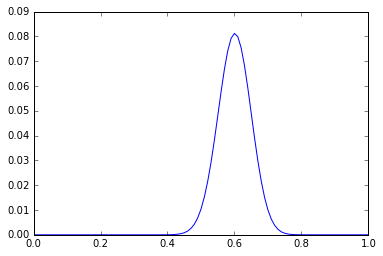

In [129]:
#take a look at the likelihood distribution

import matplotlib.pyplot as plt
%matplotlib inline 

prop = [x/100. for x in grid]
plt.plot(prop, likelihood)

With the prior and likelihood we can compute the posterior.

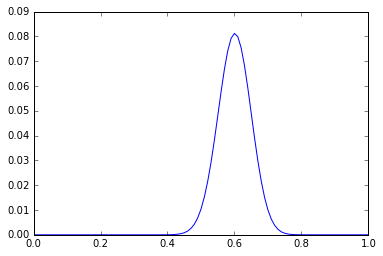

In [130]:
uspost = likelihood*prior
posterior = uspost/sum(uspost)

plt.plot(prop,posterior)

Looking at the posterior, it's the same as the prior! Well, obviously, since our prior contained no information! You can try running the code again, modifying the prior. Now let's sample the posterior to better describe and understand it.

### A worked example with conjugate priors

The example above used simulations of the distributions to approximate the solution. However, with conjugate priors, there are analytical solutions for the posterior mean and variance.

In [37]:
#equations and worked example code...

While the conjugate solution is very useful, in practice complex Bayesian models do not have an analytical solution and instead are estimated, often using MCMC (Markov Chain Monte Carlo) simulation.